## Ques 6
Using the data from Question 3, write code to analyze the data and answer the following questions Note 1.
Draw plots to demonstrate the analysis for the following questions for better visualizations. 2. Write code comments wherever required for code understanding
Insights to be drawn -

- Get all Pokemons whose spawn rate is less than 5%
- Get all Pokemons that have less than 4 weaknesses
- Get all Pokemons that have no multipliers at all
- Get all Pokemons that do not have more than 2 evolutions
- Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.
- Get all Pokemon who have more than two types of capabilities

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import ast

warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
df = pd.read_excel('Pokemon_dataset.xlsx')

In [3]:
df.head(10)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,Grass Poison,0.71,6.9,Bulbasaur Candy,25,2.0,0.6900,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,Grass Poison,0.99,13.0,Bulbasaur Candy,100,NaN,0.0420,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,Grass Poison,2.01,100.0,Bulbasaur Candy,50,NaN,0.0170,2,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25,2.0,0.2530,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100,NaN,0.0120,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,Fire Flying,1.70,90.5,Charmander Candy,50,NaN,0.0031,0,13:34,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51,9.0,Squirtle Candy,25,2.0,0.5800,58,04:25,[2],"['Electric', 'Grass']","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99,22.5,Squirtle Candy,100,NaN,0.0340,3,07:02,[1],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60,85.5,Squirtle Candy,50,NaN,0.0067,1,00:06,NaN,"['Electric', 'Grass']",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
9,10,10,Caterpie,http://www.serebii.net/pokemongo/pokemon/010.png,Bug,0.30,2.9,Caterpie Candy,12,2.0,3.0320,303,16:35,[1],"['Fire', 'Flying', 'Rock']","[{'num': '011', 'name': 'Metapod'}, {'num': '0...",NaN


- ## Get all Pokemons whose spawn rate is less than 5%

In [4]:
df['spawn_chance'].sort_values().value_counts().reset_index().rename(columns={"index":"spawn_chance","spawn_chance":"count"})

,spawn_chance,count
0,0.000,6
1,0.012,5
2,0.100,4
3,0.034,4
4,0.022,4
...,...,...
99,0.083,1
100,0.082,1
101,0.080,1
102,0.071,1


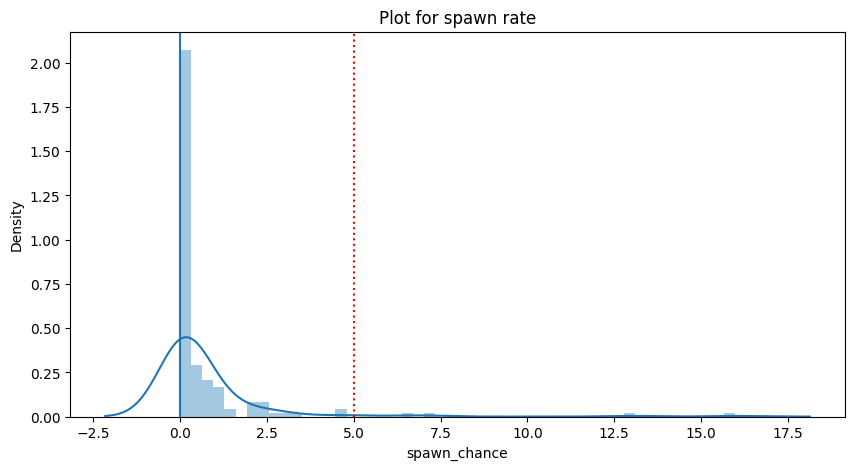

In [56]:
plt.figure(figsize=(10,5))
sns.distplot(df['spawn_chance'])
plt.axvline(x=df['spawn_chance'].min())
plt.axvline(x = 5, color = 'r', linestyle = 'dotted')
plt.title('Plot for spawn rate')
plt.show()

In [6]:
df[df.spawn_chance<5]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,Grass Poison,0.71,6.9,Bulbasaur Candy,25,2.0,0.6900,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,Grass Poison,0.99,13.0,Bulbasaur Candy,100,NaN,0.0420,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,Grass Poison,2.01,100.0,Bulbasaur Candy,50,NaN,0.0170,2,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25,2.0,0.2530,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100,NaN,0.0120,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80,3.3,Dratini Candy,25,10.0,0.3000,30,06:41,"[2, 2]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,100,NaN,0.0200,2,11:57,[2],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,Dragon Flying,2.21,210.0,Dratini Candy,50,NaN,0.0011,0,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,50,NaN,0.0000,0,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


- ## Get all Pokemons that have less than 4 weaknesses

In [7]:
weaknesses_df = df[['weaknesses']].copy()

In [8]:
# weaknesses_df['no of weaknesses'] = df['weaknesses'].apply(lambda l : len(eval(l)))

In [9]:
weaknesses_df.sort_values('weaknesses').head(10)

,weaknesses
150,"['Bug', 'Ghost', 'Dark']"
149,"['Bug', 'Ghost', 'Dark']"
95,"['Bug', 'Ghost', 'Dark']"
64,"['Bug', 'Ghost', 'Dark']"
63,"['Bug', 'Ghost', 'Dark']"
62,"['Bug', 'Ghost', 'Dark']"
96,"['Bug', 'Ghost', 'Dark']"
121,"['Bug', 'Ghost', 'Dark']"
79,"['Electric', 'Grass', 'Bug', 'Ghost', 'Dark']"
120,"['Electric', 'Grass', 'Bug', 'Ghost', 'Dark']"


In [10]:
# import ast
# weaknesses_df['weaknesses'] = weaknesses_df['weaknesses'].apply(ast.literal_eval)

In [11]:
weaknesses_df.head()

,weaknesses
0,"['Fire', 'Ice', 'Flying', 'Psychic']"
1,"['Fire', 'Ice', 'Flying', 'Psychic']"
2,"['Fire', 'Ice', 'Flying', 'Psychic']"
3,"['Water', 'Ground', 'Rock']"
4,"['Water', 'Ground', 'Rock']"


In [12]:
weaknesses_df['weaknesses cnt'] = weaknesses_df.weaknesses.apply(lambda x : len(eval(x)))

In [13]:
weaknesses_df

,weaknesses,weaknesses cnt
0,"['Fire', 'Ice', 'Flying', 'Psychic']",4
1,"['Fire', 'Ice', 'Flying', 'Psychic']",4
2,"['Fire', 'Ice', 'Flying', 'Psychic']",4
3,"['Water', 'Ground', 'Rock']",3
4,"['Water', 'Ground', 'Rock']",3
...,...,...
146,"['Ice', 'Dragon', 'Fairy']",3
147,"['Ice', 'Dragon', 'Fairy']",3
148,"['Ice', 'Rock', 'Dragon', 'Fairy']",4
149,"['Bug', 'Ghost', 'Dark']",3


In [14]:
weaknesses_df.groupby(['weaknesses cnt']).count()

,weaknesses
weaknesses cnt,
1,22
2,38
3,42
4,30
5,8
6,9
7,2


In [15]:
weaknessesPlot_df = pd.DataFrame(weaknesses_df.groupby(['weaknesses','weaknesses cnt'], as_index=False).agg(weaknessesCount_freq = ('weaknesses cnt','count')).sort_values('weaknesses cnt'))

In [16]:
weaknessesPlot_df

,weaknesses,weaknesses cnt,weaknessesCount_freq
23,['Ground'],1,6
9,['Fighting'],1,16
8,"['Electric', 'Rock']",2,9
26,"['Ice', 'Rock']",2,1
22,"['Ground', 'Psychic']",2,10
5,"['Electric', 'Grass']",2,18
14,"['Fire', 'Flying', 'Rock']",3,3
20,"['Flying', 'Psychic', 'Fairy']",3,7
0,"['Bug', 'Ghost', 'Dark']",3,8
24,"['Ice', 'Dragon', 'Fairy']",3,2


In [17]:
pos_4Start = weaknessesPlot_df[weaknessesPlot_df['weaknesses cnt']<4]['weaknesses'].count()

In [18]:
pos_4Start -= 0.5

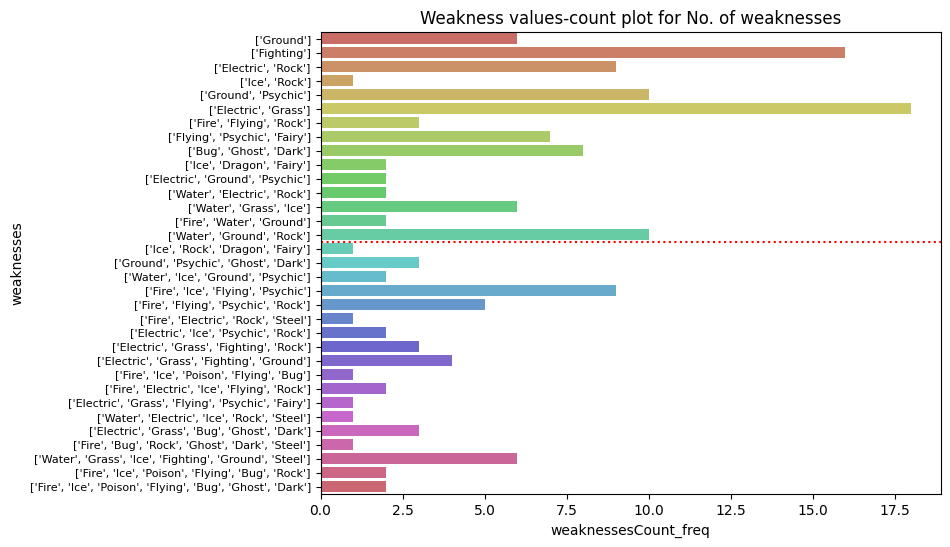

(array([2., 4., 0., 9., 0., 9., 5., 0., 3., 1.]),
 array([1. , 1.6, 2.2, 2.8, 3.4, 4. , 4.6, 5.2, 5.8, 6.4, 7. ]),
 <BarContainer object of 10 artists>)

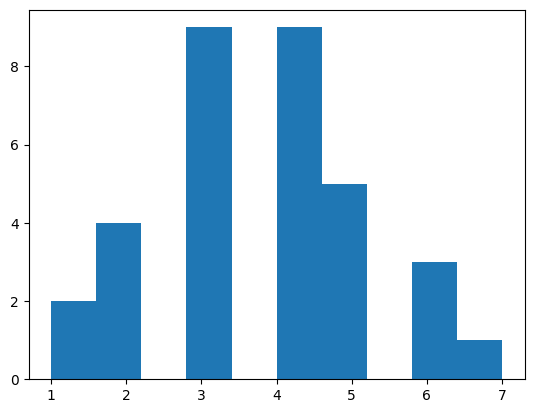

In [57]:
plt.figure(figsize=(8,6))
sns.barplot(y = 'weaknesses', x = 'weaknessesCount_freq',data=weaknessesPlot_df,palette='hls')
plt.axhline(y = pos_4Start, color = 'r', linestyle = 'dotted')
plt.title('Weakness values-count plot for No. of weaknesses')
plt.yticks(size=8)
plt.show()

In [20]:
df[df.weaknesses.apply(lambda l: len(eval(l)))<4]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25,2.0,0.2530,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",NaN
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100,NaN,0.0120,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]"
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,Fire Flying,1.70,90.5,Charmander Candy,50,NaN,0.0031,0,13:34,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51,9.0,Squirtle Candy,25,2.0,0.5800,58,04:25,[2],"['Electric', 'Grass']","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,Water,0.99,22.5,Squirtle Candy,100,NaN,0.0340,3,07:02,[1],"['Electric', 'Grass']","[{'num': '009', 'name': 'Blastoise'}]","[{'num': '007', 'name': 'Squirtle'}]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,Fire Flying,2.01,60.0,None,50,NaN,0.0000,0,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80,3.3,Dratini Candy,25,10.0,0.3000,30,06:41,"[2, 2]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",NaN
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,100,NaN,0.0200,2,11:57,[2],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,50,NaN,0.0000,0,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


- ## Get all Pokemons that have no multipliers at all

In [21]:
df.multipliers.unique()

array(['[2]', '[1, 2]', nan, '[1]', '[4, 4]', '[1, 1]', '[3, 3]',
       '[2, 2]', '[3, 4]', '[3]', '[10, 12]', '[2, 3]'], dtype=object)

In [22]:
df['multipliers'].value_counts(dropna=False)

NaN         81
[2]         25
[2, 2]      23
[1]          5
[3, 3]       5
[1, 2]       4
[3]          3
[4, 4]       1
[1, 1]       1
[3, 4]       1
[10, 12]     1
[2, 3]       1
Name: multipliers, dtype: int64

In [23]:
# mul_df = df.groupby('multipliers',dropna=False,as_index=False)['name'].count()

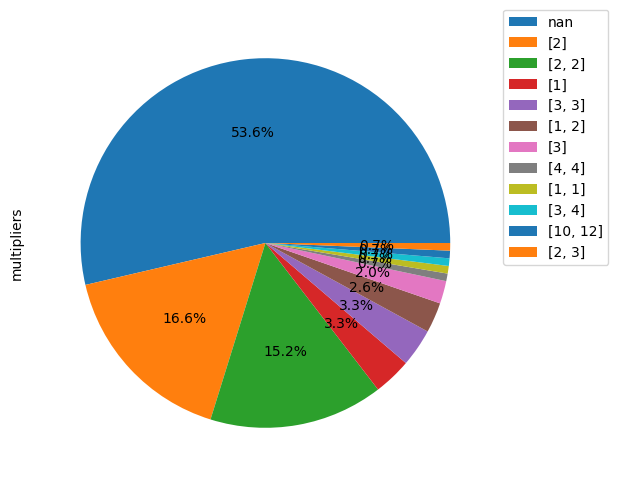

In [24]:
ax = df['multipliers'].value_counts(dropna=False).plot.pie(y = df['multipliers'],figsize = (6,6),autopct = '%1.1f%%',labeldistance = None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [25]:
df[df['multipliers'].isna()]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,Grass Poison,2.01,100.0,Bulbasaur Candy,50,NaN,0.0170,2,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,Fire Flying,1.70,90.5,Charmander Candy,50,NaN,0.0031,0,13:34,NaN,"['Water', 'Electric', 'Rock']",NaN,"[{'num': '004', 'name': 'Charmander'}, {'num':..."
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60,85.5,Squirtle Candy,50,NaN,0.0067,1,00:06,NaN,"['Electric', 'Grass']",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '..."
11,12,12,Butterfree,http://www.serebii.net/pokemongo/pokemon/012.png,Bug Flying,1.09,32.0,Caterpie Candy,50,NaN,0.0220,2,05:23,NaN,"['Fire', 'Electric', 'Ice', 'Flying', 'Rock']",NaN,"[{'num': '010', 'name': 'Caterpie'}, {'num': '..."
14,15,15,Beedrill,http://www.serebii.net/pokemongo/pokemon/015.png,Bug Poison,0.99,29.5,Weedle Candy,50,NaN,0.0510,5,04:50,NaN,"['Fire', 'Flying', 'Psychic', 'Rock']",NaN,"[{'num': '013', 'name': 'Weedle'}, {'num': '01..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,145,145,Zapdos,http://www.serebii.net/pokemongo/pokemon/145.png,Electric Flying,1.60,52.6,None,50,NaN,0.0000,0,NaN,NaN,"['Ice', 'Rock']",NaN,NaN
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,Fire Flying,2.01,60.0,None,50,NaN,0.0000,0,NaN,NaN,"['Water', 'Electric', 'Rock']",NaN,NaN
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,Dragon Flying,2.21,210.0,Dratini Candy,50,NaN,0.0011,0,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",NaN,"[{'num': '147', 'name': 'Dratini'}, {'num': '1..."
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,50,NaN,0.0000,0,NaN,NaN,"['Bug', 'Ghost', 'Dark']",NaN,NaN


- ## Get all Pokemons that do not have more than 2 evolutions

In [26]:
evl_df = df.copy()

In [27]:
evl_df[['next_evolution','prev_evolution']] = evl_df[['next_evolution','prev_evolution']].fillna('[]')

In [28]:
evl_df['next_evolution'][0]

"[{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}]"

In [29]:
evl_df['next_evolution']=evl_df['next_evolution'].apply(ast.literal_eval)

In [30]:
evl_df['next_evolution'][0]

[{'num': '002', 'name': 'Ivysaur'}, {'num': '003', 'name': 'Venusaur'}]

In [31]:
evl_df['prev_evolution']=evl_df['prev_evolution'].apply(ast.literal_eval)

In [32]:
evl_df['next_evolution'].apply(lambda x : len(x))

0      2
1      1
2      0
3      2
4      1
      ..
146    2
147    1
148    0
149    0
150    0
Name: next_evolution, Length: 151, dtype: int64

In [33]:
(evl_df['next_evolution'].apply(lambda x : len(x)) + evl_df['prev_evolution'].apply(lambda x : len(x))) <= 2

0      True
1      True
2      True
3      True
4      True
       ... 
146    True
147    True
148    True
149    True
150    True
Length: 151, dtype: bool

In [34]:
evl_df['evolution_cnt'] = (evl_df['next_evolution'].apply(lambda x : int(len(x))) + evl_df['prev_evolution'].apply(lambda x : int(len(x))))

<AxesSubplot: ylabel='Evolution Count'>

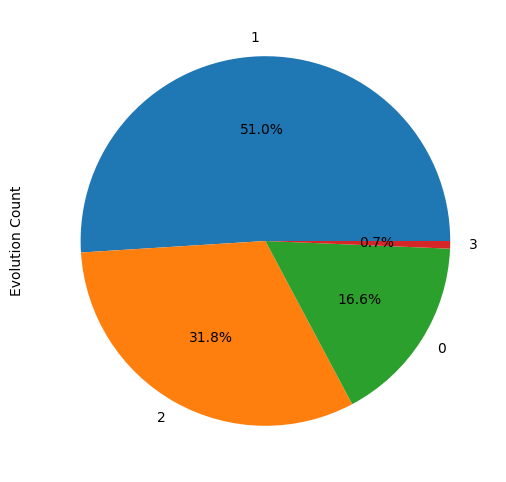

In [35]:
evl_df['evolution_cnt'].value_counts().plot.pie(y = evl_df['evolution_cnt'],label = 'Evolution Count',figsize = (6,6),autopct = '%1.1f%%')

In [36]:
evl_df[evl_df['evolution_cnt']<=2]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,evolution_cnt
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,Grass Poison,0.71,6.9,Bulbasaur Candy,25,2.0,0.6900,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",[],2
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,Grass Poison,0.99,13.0,Bulbasaur Candy,100,NaN,0.0420,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]",2
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,Grass Poison,2.01,100.0,Bulbasaur Candy,50,NaN,0.0170,2,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",[],"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ...",2
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,Fire,0.61,8.5,Charmander Candy,25,2.0,0.2530,25,08:45,[2],"['Water', 'Ground', 'Rock']","[{'num': '005', 'name': 'Charmeleon'}, {'num':...",[],2
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,Fire,1.09,19.0,Charmander Candy,100,NaN,0.0120,1,19:00,[2],"['Water', 'Ground', 'Rock']","[{'num': '006', 'name': 'Charizard'}]","[{'num': '004', 'name': 'Charmander'}]",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,Dragon,1.80,3.3,Dratini Candy,25,10.0,0.3000,30,06:41,"[2, 2]","['Ice', 'Dragon', 'Fairy']","[{'num': '148', 'name': 'Dragonair'}, {'num': ...",[],2
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,Dragon,3.99,16.5,Dratini Candy,100,NaN,0.0200,2,11:57,[2],"['Ice', 'Dragon', 'Fairy']","[{'num': '149', 'name': 'Dragonite'}]","[{'num': '147', 'name': 'Dratini'}]",2
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,Dragon Flying,2.21,210.0,Dratini Candy,50,NaN,0.0011,0,23:38,NaN,"['Ice', 'Rock', 'Dragon', 'Fairy']",[],"[{'num': '147', 'name': 'Dratini'}, {'num': '1...",2
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,Psychic,2.01,122.0,None,50,NaN,0.0000,0,NaN,NaN,"['Bug', 'Ghost', 'Dark']",[],[],0


- ## Get all Pokemons whose spawn time is less than 300 seconds.
Note - spawn time format is "05:32”, so assume “minute: second” format and perform the analysis.


In [37]:
sptm_df = df.copy()

In [38]:
sptm_df.head(3)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,Grass Poison,0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,Grass Poison,0.99,13.0,Bulbasaur Candy,100,NaN,0.042,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,Grass Poison,2.01,100.0,Bulbasaur Candy,50,NaN,0.017,2,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."


In [39]:
sptm_df["spawn_time"].unique()

array(['20:00', '07:00', '11:30', '08:45', '19:00', '13:34', '04:25',
       '07:02', '00:06', '16:35', '02:11', '05:23', '02:21', '02:30',
       '04:50', '01:34', '01:30', '01:50', '01:55', '01:56', '12:25',
       '01:11', '12:20', '04:00', '23:58', '01:58', '12:34', '01:51',
       '07:22', '12:35', '01:12', '09:02', '12:16', '03:30', '03:29',
       '13:43', '01:32', '08:46', '12:28', '02:15', '03:58', '11:33',
       '01:42', '01:22', '02:31', '23:40', '02:22', '12:37', '02:54',
       '02:44', '03:41', '23:06', '12:52', '12:33', '03:57', '03:11',
       '03:40', '09:14', '04:30', '11:25', '10:32', '02:55', '04:10',
       '09:45', '12:19', '03:20', '23:36', '12:40', '04:53', '02:50',
       '07:12', '02:56', '04:04', '15:25', '01:09', '05:10', '02:12',
       '06:46', '06:04', '15:11', '01:28', '07:39', '02:33', '04:21',
       '00:10', '03:55', '01:18', '02:17', '03:33', '03:44', '04:36',
       '09:09', '03:59', '05:58', '02:46', '08:16', '12:17', '03:21',
       '05:50', '04:

In [40]:
sptm_df['spawn_time'].value_counts(dropna=False).sort_index().reset_index()

,index,spawn_time
0,00:05,1
1,00:06,1
2,00:10,1
3,00:37,1
4,01:09,1
...,...,...
121,23:36,1
122,23:38,1
123,23:40,4
124,23:58,2


In [41]:
sptm_df['spawn_time'] = sptm_df['spawn_time'].fillna('59:59')

In [42]:
sptm_df['spawn_timeMin'] = sptm_df['spawn_time'].str.split(':').str[0].astype(int)
sptm_df['spawn_timeSec'] = sptm_df['spawn_time'].str.split(':').str[1].astype(int)

In [43]:
sptm_df['spawn_timeMin'].unique()

array([20,  7, 11,  8, 19, 13,  4,  0, 16,  2,  5,  1, 12, 23,  9,  3, 10,
       15,  6, 22, 14, 59])

In [44]:
sptm_df['Total_spawn_time_in_sec'] = sptm_df['spawn_timeMin'].apply(lambda x: int(x * 60)) + sptm_df['spawn_timeSec'].apply(lambda x: int(x))

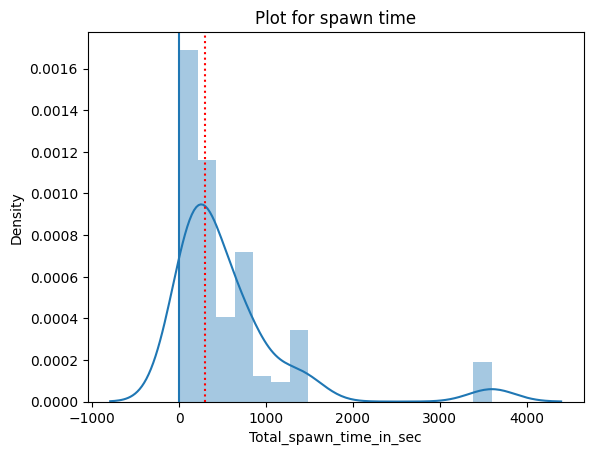

In [45]:
plt.figure()
sns.distplot(sptm_df['Total_spawn_time_in_sec'])
plt.axvline(x=sptm_df['Total_spawn_time_in_sec'].min())
plt.axvline(x = 300, color = 'r', linestyle = 'dotted')
plt.title('Plot for spawn time')
plt.show()

In [46]:
sptm_df[sptm_df['Total_spawn_time_in_sec']<300]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,spawn_timeMin,spawn_timeSec,Total_spawn_time_in_sec
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,Water,0.51,9.0,Squirtle Candy,25,2.0,0.5800,58,04:25,[2],"['Electric', 'Grass']","[{'num': '008', 'name': 'Wartortle'}, {'num': ...",NaN,4,25,265
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,Water,1.60,85.5,Squirtle Candy,50,NaN,0.0067,1,00:06,NaN,"['Electric', 'Grass']",NaN,"[{'num': '007', 'name': 'Squirtle'}, {'num': '...",0,6,6
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,Bug,0.71,9.9,Caterpie Candy,50,NaN,0.1870,19,02:11,"[4, 4]","['Fire', 'Flying', 'Rock']","[{'num': '012', 'name': 'Butterfree'}]","[{'num': '010', 'name': 'Caterpie'}]",2,11,131
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,Bug Poison,0.30,3.2,Weedle Candy,12,2.0,7.1200,712,02:21,"[1, 1]","['Fire', 'Flying', 'Psychic', 'Rock']","[{'num': '014', 'name': 'Kakuna'}, {'num': '01...",NaN,2,21,141
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,Bug Poison,0.61,10.0,Weedle Candy,50,NaN,0.4400,44,02:30,"[3, 3]","['Fire', 'Flying', 'Psychic', 'Rock']","[{'num': '015', 'name': 'Beedrill'}]","[{'num': '013', 'name': 'Weedle'}]",2,30,150
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,128,Tauros,http://www.serebii.net/pokemongo/pokemon/128.png,Normal,1.40,88.4,None,50,5.0,0.1200,12,00:37,NaN,['Fighting'],NaN,NaN,0,37,37
129,130,130,Gyarados,http://www.serebii.net/pokemongo/pokemon/130.png,Water Flying,6.50,235.0,Magikarp Candy,50,NaN,0.0032,0,02:15,NaN,"['Electric', 'Rock']",NaN,"[{'num': '129', 'name': 'Magikarp'}]",2,15,135
134,135,135,Jolteon,http://www.serebii.net/pokemongo/pokemon/135.png,Electric,0.79,24.5,None,50,NaN,0.0120,1,02:30,NaN,['Ground'],NaN,"[{'num': '133', 'name': 'Eevee'}]",2,30,150
136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,Normal,0.79,36.5,None,50,5.0,0.0120,1,02:49,NaN,['Fighting'],NaN,NaN,2,49,169


- ## Get all Pokemon who have more than two types of capabilities

In [47]:
capabilities_df = df.copy()

In [48]:
capabilities_df.head(3)

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,Grass Poison,0.71,6.9,Bulbasaur Candy,25,2.0,0.690,69,20:00,[2],"['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '002', 'name': 'Ivysaur'}, {'num': '0...",NaN
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,Grass Poison,0.99,13.0,Bulbasaur Candy,100,NaN,0.042,4,07:00,"[1, 2]","['Fire', 'Ice', 'Flying', 'Psychic']","[{'num': '003', 'name': 'Venusaur'}]","[{'num': '001', 'name': 'Bulbasaur'}]"
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,Grass Poison,2.01,100.0,Bulbasaur Candy,50,NaN,0.017,2,11:30,NaN,"['Fire', 'Ice', 'Flying', 'Psychic']",NaN,"[{'num': '001', 'name': 'Bulbasaur'}, {'num': ..."


In [49]:
capabilities_df['type'].unique()

array(['Grass Poison', 'Fire', 'Fire Flying', 'Water', 'Bug',
       'Bug Flying', 'Bug Poison', 'Normal Flying', 'Normal', 'Poison',
       'Electric', 'Ground', 'Poison Ground', 'Poison Flying',
       'Bug Grass', 'Fighting', 'Water Fighting', 'Psychic',
       'Water Poison', 'Rock Ground', 'Water Psychic', 'Water Ice',
       'Ghost Poison', 'Grass Psychic', 'Ground Rock', 'Grass',
       'Ice Psychic', 'Water Flying', 'Rock Water', 'Rock Flying',
       'Ice Flying', 'Electric Flying', 'Dragon', 'Dragon Flying'],
      dtype=object)

In [50]:
capabilities_df['type_freq'] = capabilities_df['type'].str.split(' ').apply(lambda x: len(x))

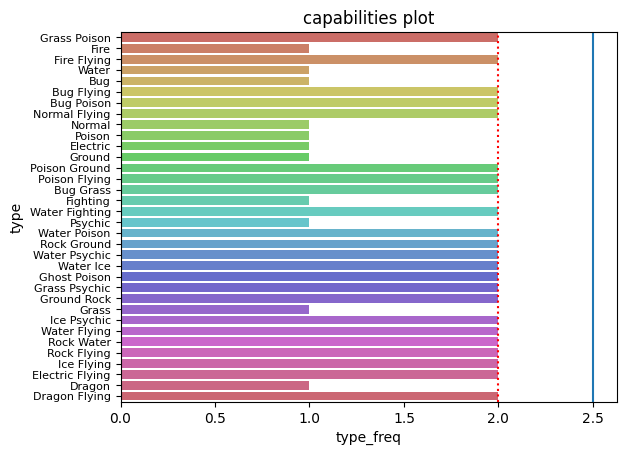

In [51]:
plt.figure()
sns.barplot(y = 'type', x = 'type_freq',data = capabilities_df[['type','type_freq']],palette='hls')
plt.axvline(x=capabilities_df['type_freq'].max()+0.5)
plt.axvline(x = 2, color = 'r', linestyle = 'dotted')
plt.title('capabilities plot')
plt.yticks(size=8)
plt.show()

In [52]:
capabilities_df[capabilities_df['type'].str.split(' ').apply(lambda x: len(x))>2]

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,multipliers,weaknesses,next_evolution,prev_evolution,type_freq
